# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Input
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Flatten
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\alice\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


### **LOAD THE DATA**

In [2]:
# Load the Excel File
df = pd.read_excel("averagemonthlyuniform_my.xlsx")

In [3]:
# Printing the first five Rows
df.head()

Year    Forecast
0  2005-01   78.558555
1  2005-02   83.554807
2  2005-03   97.742641
3  2005-04   99.754056
4  2005-05  113.538985

In [4]:
# Changing the Year column data type from object to Date Time
df['Year']= pd.to_datetime(df['Year'])

In [5]:
# Setting the Year Column as Index
df.set_index("Year", inplace = True)

In [6]:
# Shape of Dataset
df.shape

(204, 1)

In [7]:
# Plotting the forecast column
df1=df[['Forecast']]

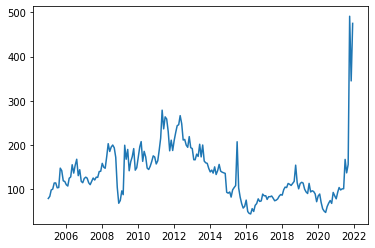

In [8]:
# Plotting the Forecast Column
plt.plot(df1)

In [9]:
# Scaline the Forecast Column values from 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
# Reshaping the Data
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.6)
# Test Size
test_size=len(df1)-training_size
# Train data and Test Data
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
# Size of Training Data and Test Data
training_size,test_size


(122, 82)

In [12]:
# convert an array of values into a dataset matrix
def traintestdataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# Considering the previous 40 time steps
time_step = 40
# Creating an Training Data and Testing Data
X_train, y_train = traintestdataset(train_data, time_step)
X_test, ytest = traintestdataset(test_data, time_step)


In [14]:
# Training Size of Independent and Dependent Columns
print(X_train.shape), print(y_train.shape)


(81, 40)
(81,)


(None, None)

In [15]:
# Testing Size of Independent and Dependent Columns
print(X_test.shape), print(ytest.shape)


(41, 40)
(41,)


(None, None)

In [16]:
# Reshaping the Trainbing Dataset
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# Reshaping the Testing Dataset
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer= 'adam')
model.summary()

TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.convolutional.Conv1D object at 0x000001A7F88A6548>

In [ ]:
model.summary()


In [ ]:
# Training the Model with 100 epochs and batch size of 64 and Testing the model on test dataset and evaluating the Valdidation Loss
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


In [ ]:
# Train and Test Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Accuracy Score
r2_score(ytest, test_predict)

In [ ]:
# Calculating the Mean Sqaured Error for the Training Set
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
# Calculating the Mean Sqaured Error for the Test Set
math.sqrt(mean_squared_error(ytest,test_predict))


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_train,train_predict))
print(mean_absolute_error(ytest,test_predict))


In [ ]:
# Transforming the Data into the Orignal Form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# look back to 40
look_back=40
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Doing predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)


In [ ]:
# Setting the Input Shape
x_input=test_data[42:].reshape(1,-1)
x_input.shape

In [ ]:
# Crating an List
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# Doing Predictions for the Next 30 Months
from numpy import array

lst_output=[]
n_steps=40
i=0
while(i<30):
    
    if(len(temp_input)>40):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,41)
day_pred=np.arange(41,71)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)


In [ ]:
df1

In [ ]:
# Prediction Plot for the Next 30 Months, Orange Line show the prediction for the Next 30 Months
plt.plot(day_new,scaler.inverse_transform(df1[164:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
# Integrating the Orignal Line with the Orignal Line
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[164:])

In [ ]:
# Overall Prediction Plot for the Next 30 months
df3=scaler.inverse_transform(df3).tolist()


In [ ]:
plt.plot(df3)
